#### **Predicting Mortgage based securities prepayment using machine learning methods**

****** 
The task is about predicting the prepayment using machine learning methods

Language:- Python

IDE:- Google Colab

Author:- Debanjan Mukhopadhyay

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#from google.colab import drive

#drive.mount('/content/gdrive')


In [3]:
#input_path="/content/gdrive/My Drive/"

In [4]:
data=pd.read_csv('C:/Study/Study/Sem 4/Project/Technocolab/Datasets/loan_level_500k.csv')
data

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,200203,NaN,203202,33460.0,0.0,1.0,O,61.0,38.0,...,SF,55400.0,F102Q1125986,C,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False
500133,689.0,200203,NaN,203202,10580.0,0.0,1.0,O,70.0,39.0,...,SF,12300.0,F102Q1125989,N,360,1.0,WELLSFARGOHOMEMORTGA,WELLSFARGOHOMEMORTGA,True,False
500134,798.0,200203,NaN,203202,19780.0,0.0,1.0,O,56.0,41.0,...,SF,50300.0,F102Q1125990,C,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False
500135,791.0,200203,NaN,203202,42044.0,0.0,1.0,O,26.0,18.0,...,SF,92600.0,F102Q1125991,N,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False


In [5]:
data.shape

(500137, 27)

There are 500137 datapoints and 27 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CREDIT_SCORE                      497426 non-null  float64
 1   FIRST_PAYMENT_DATE                500137 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG         369578 non-null  object 
 3   MATURITY_DATE                     500137 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA     429988 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE     449089 non-null  float64
 6   NUMBER_OF_UNITS                   500134 non-null  float64
 7   OCCUPANCY_STATUS                  500137 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   500124 non-null  float64
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     485208 non-null  float64
 10  ORIGINAL_UPB                      500137 non-null  int64  
 11  ORIGINAL_LOAN_TO_VALUE            500128 non-null  f

Additional description of each and every column is visualised from the above list

In [7]:
data[data['NUMBER_OF_UNITS'].isna()]
data[(data['NUMBER_OF_UNITS']==2)]

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
44,662.0,199905,N,202904,39300.0,0.0,2.0,O,75.0,24.0,...,SF,2900.0,F199Q1000091,C,360,1.0,ACCUBANC MORTGAGE CO,GMACMTGECORP,True,True
53,735.0,199905,Y,202904,NaN,25.0,2.0,O,90.0,39.0,...,SF,55900.0,F199Q1000108,P,360,1.0,"NORWEST MORTGAGE, IN",WELLSFARGOHOMEMORTGA,True,False
103,704.0,199905,NaN,202904,NaN,0.0,2.0,O,78.0,39.0,...,SF,92100.0,F199Q1000207,N,360,1.0,BANKAMERICA MORTGAGE,"BANKOFAMERICA,NA",True,False
111,NaN,199905,Y,202904,NaN,25.0,2.0,O,89.0,33.0,...,SF,53900.0,F199Q1000218,P,360,1.0,GMAC MORTGAGE CORPOR,GMACMTGECORP,True,False
120,687.0,199905,N,202904,16974.0,0.0,2.0,O,53.0,36.0,...,SF,60600.0,F199Q1000237,C,360,1.0,G N MORTGAGE CORPORA,"BAMORTGAGE,LLC",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499928,667.0,200204,N,203203,NaN,0.0,2.0,I,80.0,44.0,...,SF,37200.0,F102Q1125558,N,360,2.0,USBANKNA,USBANKNA,True,False
499929,668.0,200204,N,203203,NaN,0.0,2.0,I,80.0,44.0,...,SF,37200.0,F102Q1125560,N,360,2.0,USBANKNA,USBANKNA,True,False
499932,668.0,200204,N,203203,34980.0,0.0,2.0,I,80.0,45.0,...,SF,37200.0,F102Q1125571,N,360,2.0,USBANKNA,USBANKNA,True,False
499965,727.0,200204,N,203203,16974.0,0.0,2.0,O,79.0,35.0,...,SF,60600.0,F102Q1125627,N,360,2.0,USBANKNA,USBANKNA,True,False


**Dropping Unnecessary columns before starting with the analysis**

In [8]:
data=data.drop(['FIRST_PAYMENT_DATE', 'MATURITY_DATE', 'METROPOLITAN_STATISTICAL_AREA', 'OCCUPANCY_STATUS', 'CHANNEL', 'PRODUCT_TYPE', 'LOAN_SEQUENCE_NUMBER', 'SELLER_NAME', 'POSTAL_CODE', 'SERVICER_NAME', 'PROPERTY_STATE', 'PROPERTY_TYPE', 'LOAN_PURPOSE', 'PREPAYMENT_PENALTY_MORTGAGE_FLAG', 'NUMBER_OF_BORROWERS'], axis = 1)
data

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,DELINQUENT
0,669.0,N,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,False
1,732.0,N,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,False
2,679.0,N,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,False
3,721.0,N,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,False
4,618.0,N,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,NaN,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,False
500133,689.0,NaN,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,False
500134,798.0,NaN,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,False
500135,791.0,NaN,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,False


**Data Preprocessing and Analysis**

In [9]:
data.describe()

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM
count,497426.000000,449089.000000,500134.000000,500124.000000,485208.000000,500137.000000,500128.000000,500137.000000,500137.000000
mean,712.536212,7.744532,1.028890,76.053571,32.917541,136493.484785,75.710714,7.182687,359.855470
std,54.791262,12.046546,0.218391,15.139986,11.111800,60968.743066,14.937717,0.579941,1.908251
min,300.000000,0.000000,1.000000,6.000000,1.000000,8000.000000,6.000000,4.625000,301.000000
25%,676.000000,0.000000,1.000000,70.000000,25.000000,89000.000000,70.000000,6.875000,360.000000
50%,719.000000,0.000000,1.000000,80.000000,33.000000,126000.000000,80.000000,7.000000,360.000000
75%,756.000000,18.000000,1.000000,88.000000,41.000000,176000.000000,85.000000,7.375000,360.000000
max,839.000000,55.000000,4.000000,180.000000,65.000000,578000.000000,100.000000,11.500000,362.000000


Above chart gives a clear summary of the columns and the data distribution in terms of mean, median, interquartiles, count, max, min which gives a somewhat insight of the dataset provided.

1.   *CREDIT_SCORE*- values lie mostly between 676 and 756 which is the interquartile range.
2.   *MORTGAGE_INSURANCE_PERCENTAGE*- values lie mostly between 0 and 18 which is the interquartile range.
3.    *ORIGINAL_COMBINED_LOAN_TO_VALUE*- values lie mostly between 70 and 88 with 80 being the median.
4. *ORIGINAL_DEBT_TO_INCOME_RATIO*- values lie mostly between 25 and 41 with 33 being the median. The mean and median is almost same which gives a hint that the distribution will not have skewness.
5. *ORIGINAL_LOAN_TO_VALUE*- values lie mostly between 70 and 85 with 80 being the median.
6. *ORIGINAL_INTEREST_RATE*- values lie mostly between 6.875 and 7.375 with median 7. Mean is a bit greater than median, so there is a bit of skewness.
7. *ORIGINAL_LOAN_TERM*- Majority value is 360.
8. *NUMBER_OF_UNITS*- Majority value is 1.







In [10]:
data.isnull().sum()

CREDIT_SCORE                         2711
FIRST_TIME_HOMEBUYER_FLAG          130559
MORTGAGE_INSURANCE_PERCENTAGE       51048
NUMBER_OF_UNITS                         3
ORIGINAL_COMBINED_LOAN_TO_VALUE        13
ORIGINAL_DEBT_TO_INCOME_RATIO       14929
ORIGINAL_UPB                            0
ORIGINAL_LOAN_TO_VALUE                  9
ORIGINAL_INTEREST_RATE                  0
ORIGINAL_LOAN_TERM                      0
PREPAID                                 0
DELINQUENT                              0
dtype: int64

In [11]:
pd.DataFrame(data.FIRST_TIME_HOMEBUYER_FLAG.value_counts())

,FIRST_TIME_HOMEBUYER_FLAG
N,320418
Y,49160


In [12]:
data['FIRST_TIME_HOMEBUYER_FLAG']

0           N
1           N
2           N
3           N
4           N
         ... 
500132    NaN
500133    NaN
500134    NaN
500135    NaN
500136    NaN
Name: FIRST_TIME_HOMEBUYER_FLAG, Length: 500137, dtype: object

In [13]:
#data['FIRST_TIME_HOMEBUYER_FLAG'].fillna(data['FIRST_TIME_HOMEBUYER_FLAG'].value_counts().idxmax(), inplace=True)
data['FIRST_TIME_HOMEBUYER_FLAG'] = data['FIRST_TIME_HOMEBUYER_FLAG'].fillna('NA')

Adding another label NA in FIRST_TIME_HOMEBUYER_FLAG to accomodate the missing values in the dataset which might be useful for prediction. Also, NA has significant meaning which represents that the particular transaction doesn't qualify for FIRST TIME HOMEBUYER as it might be Investment Properties, Second Homes and Refinance transactions.

**Handling Categorical Variables using encoding methods**

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoded=pd.DataFrame(encoder.fit_transform(data[['FIRST_TIME_HOMEBUYER_FLAG']]))
encoded.columns=encoder.get_feature_names(['FIRST_TIME_HOMEBUYER_FLAG'])
data=pd.concat([data,encoded], axis=1)
#data=data.drop(['FIRST_TIME_HOMEBUYER_FLAG'], axis = 1)
data

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y
0,669.0,N,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,False,1.0,0.0,0.0
1,732.0,N,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,False,1.0,0.0,0.0
2,679.0,N,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,False,1.0,0.0,0.0
3,721.0,N,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,False,1.0,0.0,0.0
4,618.0,N,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,False,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,NA,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,False,0.0,1.0,0.0
500133,689.0,NA,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,False,0.0,1.0,0.0
500134,798.0,NA,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,False,0.0,1.0,0.0
500135,791.0,NA,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,False,0.0,1.0,0.0


In [15]:
data=data.drop(['FIRST_TIME_HOMEBUYER_FLAG'], axis = 1)

In [16]:
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,False,1.0,0.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,False,1.0,0.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,False,1.0,0.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,False,1.0,0.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,False,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,False,0.0,1.0,0.0
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,False,0.0,1.0,0.0
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,False,0.0,1.0,0.0
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,False,0.0,1.0,0.0


In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoded=pd.DataFrame(encoder.fit_transform(data[['DELINQUENT']]))
encoded.columns=encoder.get_feature_names(['DELINQUENT'])
data=pd.concat([data,encoded], axis=1)
#data=data.drop(['FIRST_TIME_HOMEBUYER_FLAG'], axis = 1)
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,False,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,False,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,False,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,False,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,False,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,False,0.0,1.0,0.0,1.0,0.0
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,False,0.0,1.0,0.0,1.0,0.0
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,False,0.0,1.0,0.0,1.0,0.0
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,False,0.0,1.0,0.0,1.0,0.0


In [18]:
data=data.drop(['DELINQUENT'], axis = 1)

In [19]:
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0


**Handling missing values in Numerical Variables/Columns and performing univariate/bivariate analysis**

array([[<AxesSubplot:title={'center':'CREDIT_SCORE'}>]], dtype=object)

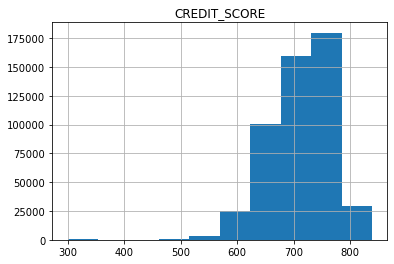

In [20]:
data.hist(column="CREDIT_SCORE")

In [21]:
data[data['CREDIT_SCORE'].isna()]

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
111,NaN,25.0,2.0,89.0,33.0,67000,89.0,7.625,360,True,0.0,0.0,1.0,1.0,0.0
307,NaN,0.0,1.0,71.0,38.0,173000,71.0,6.875,360,False,1.0,0.0,0.0,1.0,0.0
309,NaN,0.0,1.0,78.0,37.0,240000,78.0,6.875,360,True,1.0,0.0,0.0,1.0,0.0
310,NaN,0.0,1.0,72.0,34.0,176000,72.0,6.875,360,True,1.0,0.0,0.0,1.0,0.0
312,NaN,0.0,1.0,73.0,33.0,200000,73.0,6.875,360,True,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498879,NaN,0.0,1.0,33.0,11.0,85000,33.0,7.250,360,True,1.0,0.0,0.0,1.0,0.0
498949,NaN,12.0,2.0,85.0,45.0,385000,85.0,7.250,360,False,0.0,0.0,1.0,0.0,1.0
499311,NaN,0.0,1.0,67.0,14.0,53000,67.0,7.000,360,True,0.0,0.0,1.0,1.0,0.0
499799,NaN,0.0,1.0,62.0,16.0,40000,62.0,7.375,360,True,1.0,0.0,0.0,1.0,0.0


In [22]:
#data['CREDIT_SCORE'] = data['CREDIT_SCORE'].fillna(data['CREDIT_SCORE'].median())
data = data.dropna(subset=['CREDIT_SCORE'])

In [23]:
data[data['CREDIT_SCORE'].isna()]

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True


Dropping rows having blank credit score because blank credit score means no credit history which will not give any information about whether the person can payback or not and would not help in prediction task.

In [24]:
pd.DataFrame(data.CREDIT_SCORE.value_counts()).sort_index(axis=0).head(100)

,CREDIT_SCORE
300.0,511
333.0,1
359.0,1
363.0,1
366.0,1
...,...
540.0,43
541.0,42
542.0,36
543.0,61


Most of the rows in the dataset have a good credit score hovering around the mean which is greater then 700. A small proportion of the data has credit score less than 500 or unhealthy credit score.

In [25]:
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0


array([[<AxesSubplot:title={'center':'MORTGAGE_INSURANCE_PERCENTAGE'}>]],
      dtype=object)

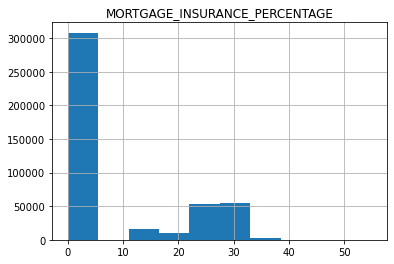

In [26]:
data[data['MORTGAGE_INSURANCE_PERCENTAGE'].isnull()]
data.hist(column="MORTGAGE_INSURANCE_PERCENTAGE")

It can be clearly seen that the mortgage insurance percentage is hovering around the median that is 0 which means that there is no mortgage insurance for most mortgages. Also, the percentage distribution doesn't exceed from more than 30-35%.

In [27]:
import random
#data['MORTGAGE_INSURANCE_PERCENTAGE'] = data['MORTGAGE_INSURANCE_PERCENTAGE'].fillna(random.randint(56,100))
for ind in data[data['MORTGAGE_INSURANCE_PERCENTAGE'].isnull()].index:
  data['MORTGAGE_INSURANCE_PERCENTAGE'][ind]=random.randint(56,100)


Replacing missing values in MORTGAGE_INSURANCE_PERCENTAGE with a random value between (56-100)%. As it is said in the data description given by the company that mortgage_insurance_percentage > 55% are kept blank. So, to add meaning to the missing values, the values are added back in a random order which might not be the same as original but it can emulate.

In [28]:
pd.DataFrame(data.MORTGAGE_INSURANCE_PERCENTAGE.value_counts()).sort_index(axis=0)

,MORTGAGE_INSURANCE_PERCENTAGE
0.0,308353
1.0,6
5.0,1
6.0,171
8.0,1
...,...
96.0,1120
97.0,1118
98.0,1036
99.0,1142


In [29]:
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0


array([[<AxesSubplot:title={'center':'NUMBER_OF_UNITS'}>]], dtype=object)

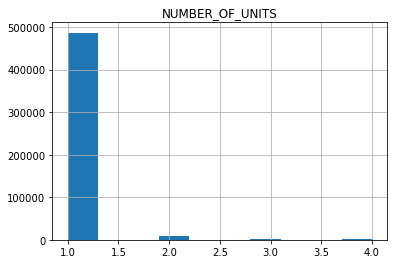

In [30]:
data[data['NUMBER_OF_UNITS'].isnull()]
data.hist(column="NUMBER_OF_UNITS")

Number of units is discrete in nature and there are 4 values 1, 2, 3 and 4. Most prevalent number of units is 1 as can be seen from the above distribution.

In [31]:
#data['NUMBER_OF_UNITS'] = data['NUMBER_OF_UNITS'].fillna(0)
data = data.dropna(subset=['NUMBER_OF_UNITS'])

Dropping the rows with missing values of NUMBER_OF_UNITS as there is very less data which is missing and it will not result in major information loss.

In [32]:
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0


array([[<AxesSubplot:title={'center':'ORIGINAL_COMBINED_LOAN_TO_VALUE'}>]],
      dtype=object)

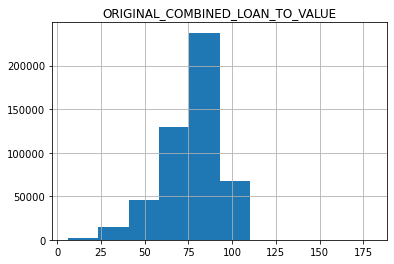

In [33]:
data[data['ORIGINAL_COMBINED_LOAN_TO_VALUE'].isnull()]
data.hist(column="ORIGINAL_COMBINED_LOAN_TO_VALUE")

In [34]:
data = data.dropna(subset=['ORIGINAL_COMBINED_LOAN_TO_VALUE'])

array([[<AxesSubplot:title={'center':'ORIGINAL_LOAN_TO_VALUE'}>]],
      dtype=object)

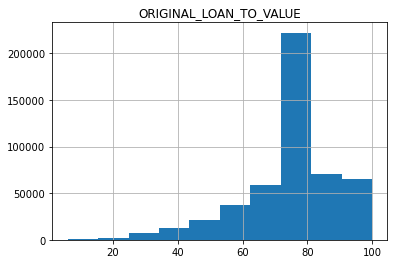

In [35]:
data.hist(column="ORIGINAL_LOAN_TO_VALUE")

In [36]:
data = data.dropna(subset=['ORIGINAL_LOAN_TO_VALUE'])

Dropping the rows with missing values of ORIGINAL_COMBINED_LOAN_TO_VALUE and ORIGINAL_LOAN_TO_VALUE as there is very less data which is missing and it will not result in major information loss.

array([[<AxesSubplot:title={'center':'ORIGINAL_DEBT_TO_INCOME_RATIO'}>]],
      dtype=object)

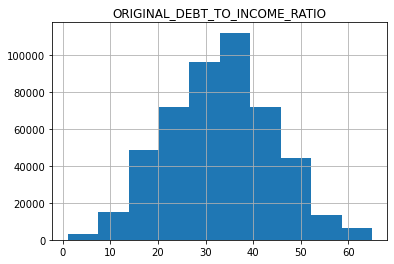

In [37]:
data[data['ORIGINAL_DEBT_TO_INCOME_RATIO'].isnull()]
data.hist(column="ORIGINAL_DEBT_TO_INCOME_RATIO")

In [38]:
data['ORIGINAL_DEBT_TO_INCOME_RATIO'] = data['ORIGINAL_DEBT_TO_INCOME_RATIO'].fillna(66)

Here the distribution is similar to normal distribution. Thus, for the missing values to be replaced with different values, it might hamper with the distribution and result in outliers. Thus, replacing all the na values with a constant value of 66 as in the data description it is written that above 65%, the column value is kept empty or NaN.

In [39]:
pd.DataFrame(data.ORIGINAL_DEBT_TO_INCOME_RATIO.value_counts())

,ORIGINAL_DEBT_TO_INCOME_RATIO
28.0,20074
36.0,16612
33.0,16302
35.0,16219
34.0,16196
...,...
65.0,523
4.0,442
3.0,358
2.0,210


In [40]:
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0


In [41]:
data_num= data.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
data_num

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True
...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True


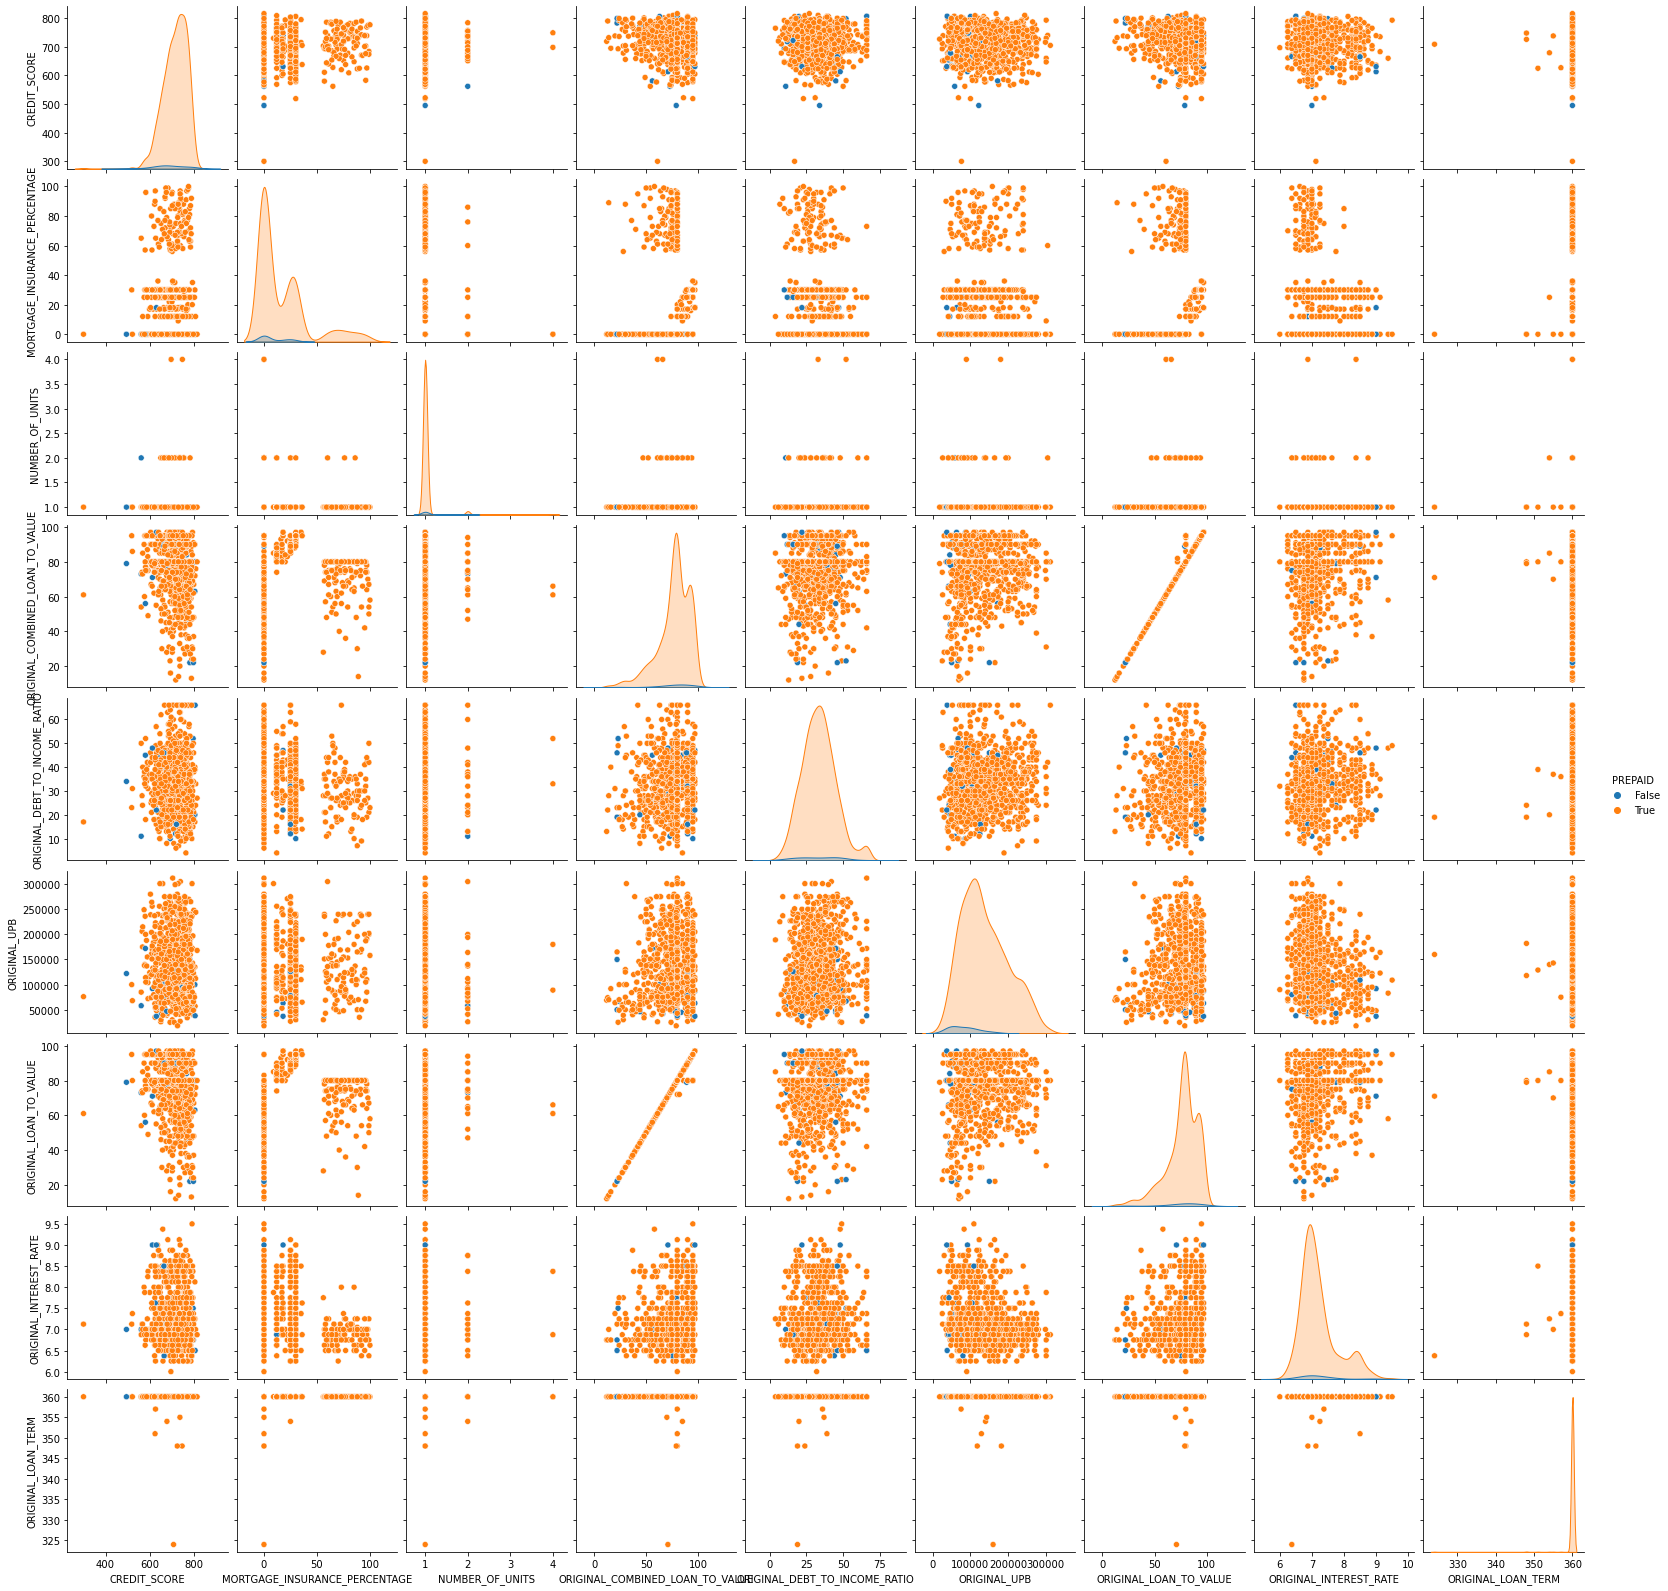

In [42]:
#sns.pairplot(data_num,hue='PREPAID')
sns.pairplot(data_num.sample(1000),hue='PREPAID')

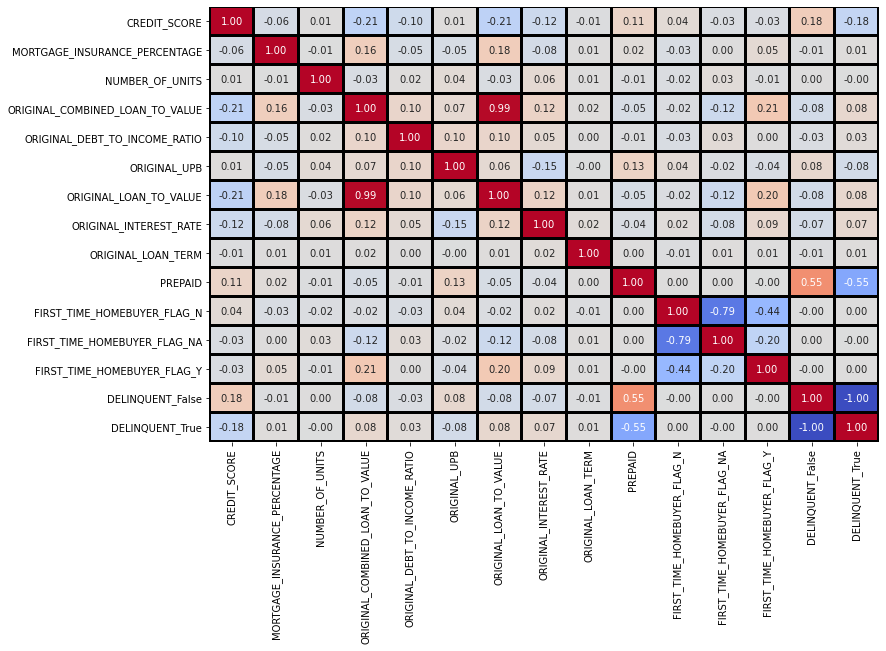

In [43]:
import matplotlib.pyplot as mp
plt.figure(figsize=(12,8))
dataplot=sns.heatmap(data.corr() , annot=True, cbar=False,fmt="0.2f", cmap="coolwarm", linecolor="black", linewidth=2  )
  
mp.show()

ORIGINAL_LOAN_TO_VALUE and ORIGINAL_COMBINED_LOAN_TO_VALUE are highly correlated. ORIGINAL_LOAN_tO_VALUE, ORIGINAL_COMBINED_LOAN_TO_VALUE, AND MORTGAGE_INSURANCE_PERCENTAGE are slightly correlated. PREPAID and DELINQUENT are moderately negative correlated.

The above count shows that a person who has PREPAID cannot be DELINQUENT and a person who is DELINQUENT cannot be PREPAID. However, there is a possibility that a person is not DELINQUENT AND not PREPAID. Hence, we see a difference in counts for PREPAID and DELINQUENT and not a perfect negative correlation.

array([[<AxesSubplot:title={'center':'NUMBER_OF_UNITS'}>]], dtype=object)

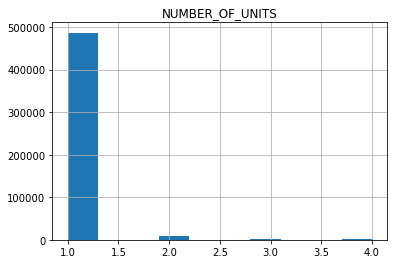

In [44]:
data.hist(column="NUMBER_OF_UNITS")

Number of units is mostly 1 in the dataset.

,ORIGINAL_LOAN_TERM
360,492741
354,605
348,405
349,281
350,208
...,...
302,6
319,6
304,5
303,4


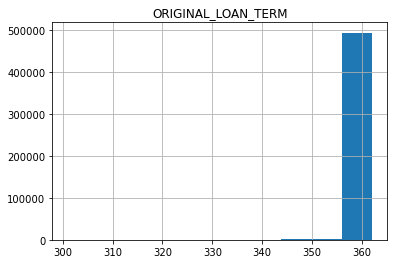

In [45]:
data.hist(column="ORIGINAL_LOAN_TERM")
pd.DataFrame(data.ORIGINAL_LOAN_TERM.value_counts())

Most loan terms are 360 months or 30 years as can be seen from the histogram.

In [46]:
pd.DataFrame(data.ORIGINAL_INTEREST_RATE.value_counts())

,ORIGINAL_INTEREST_RATE
6.875,87981
7.000,62489
6.750,56697
7.125,43132
7.250,42043
...,...
7.399,1
7.314,1
7.820,1
6.100,1


**Visualising the relation between dependent and independent variables using boxplot**

<AxesSubplot:xlabel='PREPAID', ylabel='CREDIT_SCORE'>

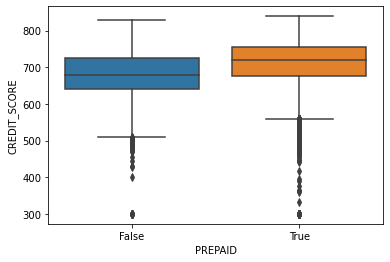

In [47]:
sns.boxplot(x='PREPAID', y='CREDIT_SCORE', data=data)

<AxesSubplot:xlabel='PREPAID', ylabel='ORIGINAL_COMBINED_LOAN_TO_VALUE'>

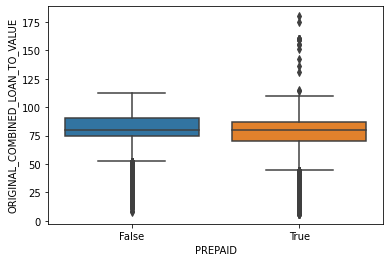

In [48]:
sns.boxplot(x='PREPAID', y='ORIGINAL_COMBINED_LOAN_TO_VALUE', data=data)

<AxesSubplot:xlabel='PREPAID', ylabel='ORIGINAL_LOAN_TO_VALUE'>

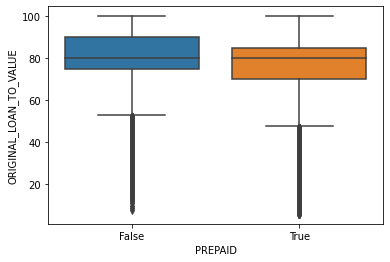

In [49]:
sns.boxplot(x='PREPAID', y='ORIGINAL_LOAN_TO_VALUE', data=data)

<AxesSubplot:xlabel='PREPAID', ylabel='ORIGINAL_UPB'>

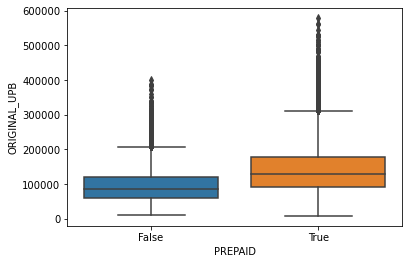

In [50]:
sns.boxplot(x='PREPAID', y='ORIGINAL_UPB', data=data)

<AxesSubplot:xlabel='PREPAID', ylabel='MORTGAGE_INSURANCE_PERCENTAGE'>

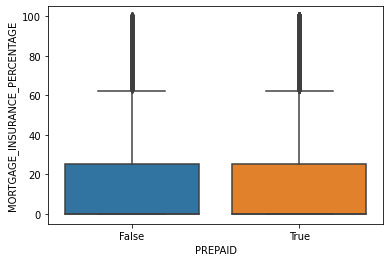

In [51]:
sns.boxplot(x='PREPAID', y='MORTGAGE_INSURANCE_PERCENTAGE', data=data)

<AxesSubplot:xlabel='PREPAID', ylabel='NUMBER_OF_UNITS'>

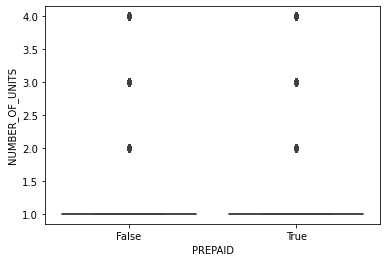

In [52]:
sns.boxplot(x='PREPAID', y='NUMBER_OF_UNITS', data=data)

<AxesSubplot:xlabel='PREPAID', ylabel='ORIGINAL_DEBT_TO_INCOME_RATIO'>

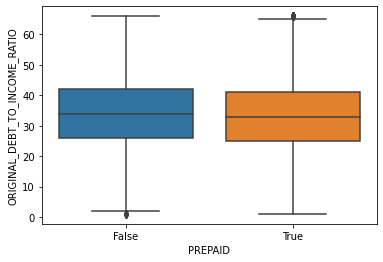

In [53]:
sns.boxplot(x='PREPAID', y='ORIGINAL_DEBT_TO_INCOME_RATIO', data=data)

From the box plot representation, it is hard to distinguish/classify between True and False value of PREPAID based on individual independent variables. Thus, a combination of the features may help in proper classification between classes

**Outlier Detection**

<AxesSubplot:xlabel='CREDIT_SCORE'>

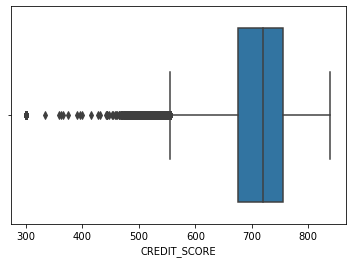

In [54]:
sns.boxplot(data_num['CREDIT_SCORE'])

<AxesSubplot:xlabel='MORTGAGE_INSURANCE_PERCENTAGE'>

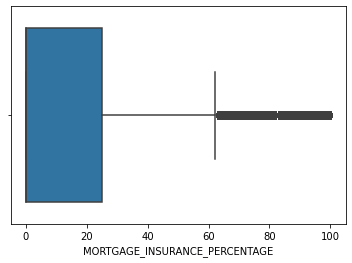

In [55]:
sns.boxplot(data_num['MORTGAGE_INSURANCE_PERCENTAGE'])

<AxesSubplot:xlabel='ORIGINAL_COMBINED_LOAN_TO_VALUE'>

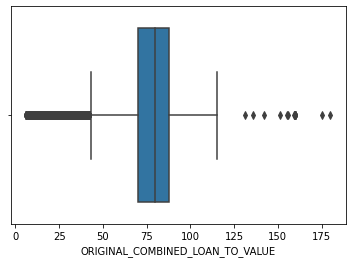

In [56]:
sns.boxplot(data_num['ORIGINAL_COMBINED_LOAN_TO_VALUE'])

<AxesSubplot:xlabel='ORIGINAL_LOAN_TO_VALUE'>

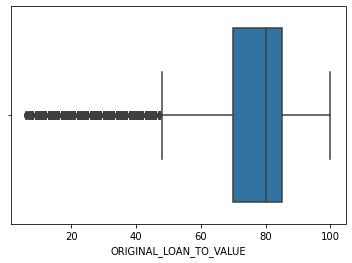

In [57]:
sns.boxplot(data_num['ORIGINAL_LOAN_TO_VALUE'])

<AxesSubplot:xlabel='ORIGINAL_DEBT_TO_INCOME_RATIO'>

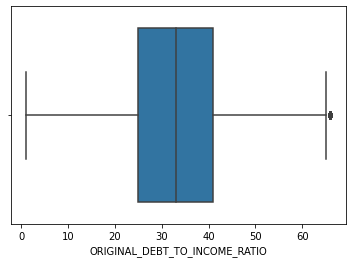

In [58]:
sns.boxplot(data_num['ORIGINAL_DEBT_TO_INCOME_RATIO'])

<AxesSubplot:xlabel='ORIGINAL_UPB'>

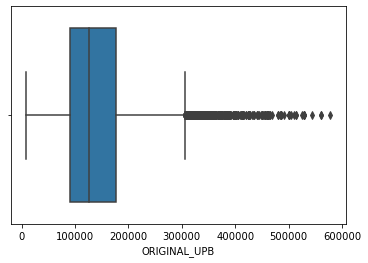

In [59]:
sns.boxplot(data_num['ORIGINAL_UPB'])

<AxesSubplot:xlabel='ORIGINAL_INTEREST_RATE'>

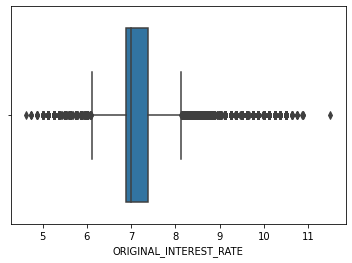

In [60]:
sns.boxplot(data_num['ORIGINAL_INTEREST_RATE'])

It can be seen that there are multiple outliers in ORIGINAL_DEBT_TO_INCOME_RATIO, ORIGINAL_LOAN_TO_VALUE, ORIGNINAL_COMBINED_LOAN_TO_VALUE, CREDIT_SCORE, MORTGAGE_INSURANCE_PERCENTAGE, ORIGINAL_UPB column of the dataset. During model building we will check if outliers is informative for the model or not. If not, we will drop the outliers accordingly in the future.

CREDIT_SCORE, ORIGINAL_LOAN_TO_VALUE, ORIGINAL_COMBINED_LOAN_TO_VALUE are left skewed. On the other hand, ORIGINAL_UPB and MORTGAGE_INTEREST_RATE are right skewed.

**Splitting the dataset into train and test**

In [61]:
data.describe()

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
count,497410.000000,497410.000000,497410.000000,497410.000000,497410.00000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000
mean,712.535960,14.903506,1.028693,76.048620,33.91344,136523.909853,75.705372,7.181635,359.855294,0.640906,0.261390,0.097704,0.964140,0.035860
std,54.791154,24.463763,0.217832,15.135019,12.30759,60938.794139,14.932385,0.579479,1.909512,0.479735,0.439392,0.296914,0.185941,0.185941
min,300.000000,0.000000,1.000000,6.000000,1.00000,8000.000000,6.000000,4.625000,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,676.000000,0.000000,1.000000,70.000000,25.00000,90000.000000,70.000000,6.875000,360.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,719.000000,0.000000,1.000000,80.000000,33.00000,127000.000000,80.000000,7.000000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,756.000000,25.000000,1.000000,88.000000,41.00000,176000.000000,85.000000,7.375000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,839.000000,100.000000,4.000000,180.000000,66.00000,578000.000000,100.000000,11.500000,362.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
bins=[0,500,550,600,650,700,750,800,850]
labels=[0,1,2,3,4,5,6,7]
data['CREDIT_SCORE_RANGE']=pd.cut(data['CREDIT_SCORE'], bins, labels=labels)
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True,CREDIT_SCORE_RANGE
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,1.0,0.0,0.0,1.0,0.0,4
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,1.0,0.0,0.0,1.0,0.0,5
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,1.0,0.0,0.0,1.0,0.0,4
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,1.0,0.0,0.0,1.0,0.0,5
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,1.0,0.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0,6
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0,4
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0,6
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0,6


In [63]:
bins=[0,40,75,100]
labels=[0,1,2]
data['ORIGINAL_LOAN_TO_VALUE_RANGE']=pd.cut(data['ORIGINAL_LOAN_TO_VALUE'], bins, labels=labels)
data

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True,CREDIT_SCORE_RANGE,ORIGINAL_LOAN_TO_VALUE_RANGE
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,1.0,0.0,0.0,1.0,0.0,4,2
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,1.0,0.0,0.0,1.0,0.0,5,0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,1.0,0.0,0.0,1.0,0.0,4,2
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,1.0,0.0,0.0,1.0,0.0,5,0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,1.0,0.0,0.0,1.0,0.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0,6,1
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0,4,1
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0,6,1
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,True,0.0,1.0,0.0,1.0,0.0,6,0


In [64]:
data.describe()

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
count,497410.000000,497410.000000,497410.000000,497410.000000,497410.00000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000
mean,712.535960,14.903506,1.028693,76.048620,33.91344,136523.909853,75.705372,7.181635,359.855294,0.640906,0.261390,0.097704,0.964140,0.035860
std,54.791154,24.463763,0.217832,15.135019,12.30759,60938.794139,14.932385,0.579479,1.909512,0.479735,0.439392,0.296914,0.185941,0.185941
min,300.000000,0.000000,1.000000,6.000000,1.00000,8000.000000,6.000000,4.625000,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,676.000000,0.000000,1.000000,70.000000,25.00000,90000.000000,70.000000,6.875000,360.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,719.000000,0.000000,1.000000,80.000000,33.00000,127000.000000,80.000000,7.000000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,756.000000,25.000000,1.000000,88.000000,41.00000,176000.000000,85.000000,7.375000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,839.000000,100.000000,4.000000,180.000000,66.00000,578000.000000,100.000000,11.500000,362.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
X = data.iloc[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14]]
X

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,360,0.0,1.0,0.0,1.0,0.0
500133,689.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,360,0.0,1.0,0.0,1.0,0.0
500134,798.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,360,0.0,1.0,0.0,1.0,0.0
500135,791.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,360,0.0,1.0,0.0,1.0,0.0


In [66]:
y= data.iloc[:, [9]]
y

,PREPAID
0,True
1,True
2,True
3,True
4,True
...,...
500132,True
500133,True
500134,True
500135,True


In [67]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y['PREPAID'] = labelencoder.fit_transform(y['PREPAID'])
y

,PREPAID
0,1
1,1
2,1
3,1
4,1
...,...
500132,1
500133,1
500134,1
500135,1


In [68]:
X.head()

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,1.0,0.0,0.0,1.0,0.0


In [69]:
X.describe()

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
count,497410.000000,497410.000000,497410.000000,497410.000000,497410.00000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000
mean,712.535960,14.903506,1.028693,76.048620,33.91344,136523.909853,75.705372,7.181635,359.855294,0.640906,0.261390,0.097704,0.964140,0.035860
std,54.791154,24.463763,0.217832,15.135019,12.30759,60938.794139,14.932385,0.579479,1.909512,0.479735,0.439392,0.296914,0.185941,0.185941
min,300.000000,0.000000,1.000000,6.000000,1.00000,8000.000000,6.000000,4.625000,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,676.000000,0.000000,1.000000,70.000000,25.00000,90000.000000,70.000000,6.875000,360.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,719.000000,0.000000,1.000000,80.000000,33.00000,127000.000000,80.000000,7.000000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,756.000000,25.000000,1.000000,88.000000,41.00000,176000.000000,85.000000,7.375000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,839.000000,100.000000,4.000000,180.000000,66.00000,578000.000000,100.000000,11.500000,362.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
## Removing outliers using mean and 2 standard deviation

In [71]:
cols=["CREDIT_SCORE","MORTGAGE_INSURANCE_PERCENTAGE", "ORIGINAL_COMBINED_LOAN_TO_VALUE", "ORIGINAL_DEBT_TO_INCOME_RATIO", "ORIGINAL_UPB", "ORIGINAL_LOAN_TO_VALUE", "ORIGINAL_INTEREST_RATE", "ORIGINAL_LOAN_TERM"]
for i in X[cols]:
    mean=np.mean(X[i])
    std_dev=np.std(X[i])
    X[i]=np.where(X[i]>(mean+2*std_dev),mean,X[i])
    X[i]=np.where(X[i]<(mean-2*std_dev),mean,X[i])
    
X.head()

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
0,669.0,0.0,1.0,80.00000,33.0,162000.0,80.000000,7.120,359.855294,1.0,0.0,0.0,1.0,0.0
1,732.0,0.0,1.0,76.04862,10.0,53000.0,75.705372,6.500,360.000000,1.0,0.0,0.0,1.0,0.0
2,679.0,30.0,1.0,91.00000,48.0,133000.0,91.000000,6.750,359.855294,1.0,0.0,0.0,1.0,0.0
3,721.0,0.0,1.0,76.04862,13.0,174000.0,75.705372,6.625,359.855294,1.0,0.0,0.0,1.0,0.0
4,618.0,25.0,1.0,85.00000,24.0,122000.0,85.000000,6.375,359.855294,1.0,0.0,0.0,1.0,0.0


In [72]:
X.describe()

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_NA,FIRST_TIME_HOMEBUYER_FLAG_Y,DELINQUENT_False,DELINQUENT_True
count,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000,497410.000000
mean,716.363611,9.295960,1.028693,78.165851,32.966803,131087.322627,77.816048,7.084404,359.997337,0.640906,0.261390,0.097704,0.964140,0.035860
std,48.297033,13.483641,0.217832,11.602506,10.051344,53749.772524,11.402619,0.410357,0.057799,0.479735,0.439392,0.296914,0.185941,0.185941
min,603.000000,0.000000,1.000000,46.000000,10.000000,15000.000000,46.000000,6.025000,357.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,681.000000,0.000000,1.000000,73.000000,26.000000,90000.000000,73.000000,6.875000,360.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,719.000000,0.000000,1.000000,80.000000,33.913440,127000.000000,80.000000,7.000000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,756.000000,18.000000,1.000000,88.000000,40.000000,167000.000000,85.000000,7.250000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,822.000000,63.000000,4.000000,105.000000,58.000000,258000.000000,100.000000,8.330000,362.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
## Scaling

In [74]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.301370,0.000000,0.0,0.576271,0.479167,0.604938,0.629630,0.475054,0.571059,1.0,0.0,0.0,1.0,0.0
1,0.589041,0.000000,0.0,0.509299,0.000000,0.156379,0.550099,0.206074,0.600000,1.0,0.0,0.0,1.0,0.0
2,0.347032,0.476190,0.0,0.762712,0.791667,0.485597,0.833333,0.314534,0.571059,1.0,0.0,0.0,1.0,0.0
3,0.538813,0.000000,0.0,0.509299,0.062500,0.654321,0.550099,0.260304,0.571059,1.0,0.0,0.0,1.0,0.0
4,0.068493,0.396825,0.0,0.661017,0.291667,0.440329,0.722222,0.151844,0.571059,1.0,0.0,0.0,1.0,0.0


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

**Next step is selecting models, seeing the importance of outliers in prediction, balancing the training data if needed or using XGBoost model that works with imbalanced training set.**

In [76]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
# predicting all as positive (accuracy_score)
import numpy as np
np.sum(y_test==1)/len(y_test)

PREPAID    0.96136
dtype: float64

In [78]:
model=RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [79]:
pred=model.predict(X_test)
accuracy_score(y_test, pred)

0.9686878028186003

<AxesSubplot:>

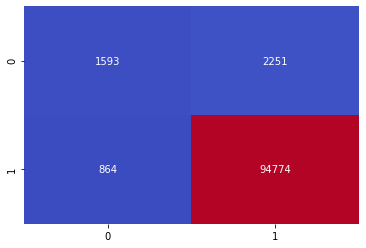

In [80]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="coolwarm", cbar=False, fmt="0.0f")

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.65      0.41      0.51      3844
           1       0.98      0.99      0.98     95638

    accuracy                           0.97     99482
   macro avg       0.81      0.70      0.74     99482
weighted avg       0.96      0.97      0.97     99482



This model does little bit better than randomly predicting all as positve

In [82]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

### Oversampling

In [83]:
oversample = SMOTE(random_state=101)
X1, y1 = oversample.fit_resample(X, y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=1, stratify=y1)

In [84]:
model1=RandomForestClassifier(n_jobs=-1)
model1.fit(X_train1, y_train1)

RandomForestClassifier(n_jobs=-1)

In [85]:
pred1=model1.predict(X_test1)
accuracy_score(y_test1, pred1)

0.9799033856835149

<AxesSubplot:>

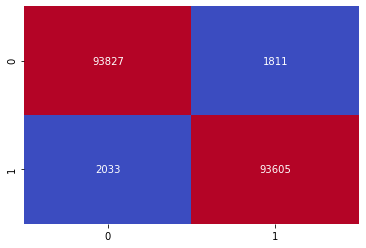

In [86]:
sns.heatmap(confusion_matrix(y_test1, pred1), annot=True, cmap="coolwarm", cbar=False, fmt="0.0f")

In [87]:
print(classification_report(y_test1,pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     95638
           1       0.98      0.98      0.98     95638

    accuracy                           0.98    191276
   macro avg       0.98      0.98      0.98    191276
weighted avg       0.98      0.98      0.98    191276



### Undersampling

In [88]:
under = RandomUnderSampler(sampling_strategy= 0.6)
X2, y2 = under.fit_resample(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=1, stratify=y2)

In [89]:
model2=RandomForestClassifier(n_jobs=-1)
model2.fit(X_train2, y_train2)

RandomForestClassifier(n_jobs=-1)

In [90]:
pred2=model2.predict(X_test2)
accuracy_score(y_test2, pred2)

0.8248146703082325

<AxesSubplot:>

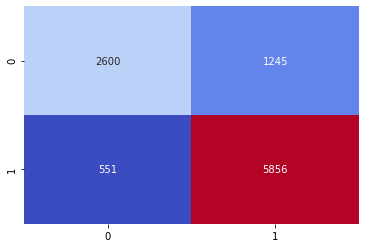

In [91]:
sns.heatmap(confusion_matrix(y_test2, pred2), annot=True, cmap="coolwarm", cbar=False, fmt="0.0f")

In [92]:
print(classification_report(y_test2,pred2))

              precision    recall  f1-score   support

           0       0.83      0.68      0.74      3845
           1       0.82      0.91      0.87      6407

    accuracy                           0.82     10252
   macro avg       0.82      0.80      0.81     10252
weighted avg       0.82      0.82      0.82     10252



### XGBosst

In [93]:
model4=XGBClassifier()
model4.fit(X_train, y_train)

[14:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
pred4=model4.predict(X_test)
accuracy_score(y_test, pred4)

0.9691602500954947

<AxesSubplot:>

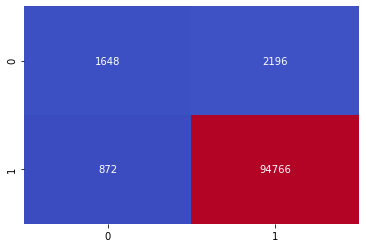

In [95]:
sns.heatmap(confusion_matrix(y_test, pred4), annot=True, cmap="coolwarm", cbar=False, fmt="0.0f")

In [96]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.65      0.43      0.52      3844
           1       0.98      0.99      0.98     95638

    accuracy                           0.97     99482
   macro avg       0.82      0.71      0.75     99482
weighted avg       0.96      0.97      0.97     99482



### XGBoost with oversampling

In [97]:
model5=XGBClassifier()
model5.fit(X_train1, y_train1)

[14:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
pred5=model5.predict(X_test1)
accuracy_score(y_test1, pred5)

0.9769286266965014

### HyperTunning

In [99]:
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('max_colwidth', -1)

In [100]:
## Parameters for Random Forest
r_grid = {
    "n_estimators": [50,100,200],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [3,5,7,9,11,13,15,17,19,21, None]
}

rfc=RandomForestClassifier(n_jobs=-1)

In [101]:
random_search_rf = RandomizedSearchCV(estimator=rfc, param_distributions=r_grid, n_iter =10, cv = 5)

In [102]:
## Have used the data from oversampling data because it had highest accuracy
random_search_rf.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 100, 200]})

In [103]:
results=pd.DataFrame(random_search_rf.cv_results_)
res_df=results[["rank_test_score","mean_test_score","params"]].sort_values("rank_test_score")
res_df.reset_index(drop=True)

,rank_test_score,mean_test_score,params
0,1,0.944473,"{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 21}"
1,2,0.931192,"{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 19}"
2,3,0.930899,"{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 19}"
3,4,0.916705,"{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 17}"
4,5,0.915887,"{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 17}"
5,6,0.915726,"{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 17}"
6,7,0.899748,"{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 15}"
7,8,0.856359,"{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 9}"
8,9,0.809646,"{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 5}"
9,10,0.768647,"{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 3}"


In [104]:
accuracy_score(y_test1,random_search_rf.predict(X_test1))

0.945586482360568

In [105]:
## Parameters for XGBoost
param_grid = { 
    "n_estimators": [100,200,500,1000],
    "max_depth" : [3,5,7,9, None],
    "learning_rate":[0.01,0.05,0.07,0.1],
    "subsample":[0.7,0.8,0.9,1.0]
    }  
xgb=XGBClassifier()

In [106]:
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter =10, cv = 5)

In [107]:
random_search_xgb.fit(X_train1, y_train1)

[14:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [108]:
results=pd.DataFrame(random_search_xgb.cv_results_)
res_df=results[["rank_test_score","mean_test_score","params"]].sort_values("rank_test_score")
res_df.reset_index(drop=True)

,rank_test_score,mean_test_score,params
0,1,0.972445,"{'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.07}"
1,2,0.971527,"{'subsample': 0.8, 'n_estimators': 500, 'max_depth': None, 'learning_rate': 0.05}"
2,3,0.960115,"{'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.01}"
3,4,0.952626,"{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.07}"
4,5,0.940499,"{'subsample': 0.8, 'n_estimators': 1000, 'max_depth': None, 'learning_rate': 0.01}"
5,6,0.938958,"{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.01}"
6,7,0.913998,"{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.07}"
7,8,0.893495,"{'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01}"
8,9,0.893309,"{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}"
9,10,0.838004,"{'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}"


In [109]:
accuracy_score(y_test1,random_search_xgb.predict(X_test1))

0.9731278362157302